<font size = '6' >**Loading packages**</font>



In [1]:
import pandas as pd
import numpy as np
import scipy
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
from PIL import Image
import cv2
import tensorflow as tf
import seaborn as sns
import random
import tensorflow.keras.backend as K

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

<font size = '6' >**Exploratory Data Analysis**</font>

<font size = '4' >**train data**</font>

In [2]:
train_df = pd.read_csv("../input/hpa-single-cell-image-classification/train.csv")
train_df.head()

,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


In [3]:
print(f'We have {train_df.shape[0]} rows and {train_df.shape[1]} columns in our train_df.csv.')
print(f'Missing values in train_df.csv in each columns:\n{train_df.isnull().sum()}')
print('Unique Values in each column of train_df.csv')
print('##########################################')
for col in train_df:
    print(f'{col}: {train_df[col].nunique()}')

We have 21806 rows and 2 columns in our train_df.csv.
Missing values in train_df.csv in each columns:
ID       0
Label    0
dtype: int64
Unique Values in each column of train_df.csv
##########################################
ID: 21806
Label: 432


<font size = '4' >**test data**</font>

In [4]:
sample_sub = pd.read_csv('../input/hpa-single-cell-image-classification/sample_submission.csv')
sample_sub.head()

,ID,ImageWidth,ImageHeight,PredictionString
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
1,004a270d-34a2-4d60-bbe4-365fca868193,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
2,00537262-883c-4b37-a3a1-a4931b6faea5,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
3,00c9a1c9-2f06-476f-8b0d-6d01032874a2,2048,2048,0 1 eNoLCAgIMAEABJkBdQ==
4,0173029a-161d-40ef-af28-2342915b22fb,3072,3072,0 1 eNoLCAgIsAQABJ4Beg==


In [5]:
# spliting label column
train_df["Label"] = train_df["Label"].str.split("|")

# class labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']

# binarizing each label/class
for label in tqdm(class_labels):
    train_df[label] = train_df['Label'].map(lambda result: 1 if label in result else 0)

# rename column
train_df.columns = ['ID', 'Label', 'Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center',
                    'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 'Golgi apparatus', 'Intermediate filaments',
                    'Actin filaments', 'Microtubules', 'Mitotic spindle', 'Centrosome', 'Plasma membrane', 'Mitochondria',
                    'Aggresome', 'Cytosol', 'Vesicles and punctate cytosolic patterns', 'Negative']

train_df

  0%|          | 0/19 [00:00<?, ?it/s]

,ID,Label,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,"[8, 5, 0]",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[6, 1]",0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,"[16, 10]",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21801,dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0,[14],0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21802,dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0,"[3, 0]",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21803,dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21804,df573730-bbca-11e8-b2bc-ac1f6b6435d0,[14],0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
class_counts = train_df.sum().drop(['ID', 'Label']).sort_values(ascending=False)

print('Per class count in train dataset')
print('-------------------------------------------------')
for column in class_counts.keys():
    print(f"The class {column} has {train_df[column].sum()} samples")

Per class count in train dataset
-------------------------------------------------
The class Nucleoplasm has 8797 samples
The class Cytosol has 5685 samples
The class Plasma membrane has 3111 samples
The class Nucleoli has 2451 samples
The class Mitochondria has 2013 samples
The class Golgi apparatus has 1846 samples
The class Nuclear bodies has 1792 samples
The class Centrosome has 1734 samples
The class Nuclear speckles has 1425 samples
The class Nucleoli fibrillar center has 1262 samples
The class Nuclear membrane has 1095 samples
The class Actin filaments has 998 samples
The class Intermediate filaments has 964 samples
The class Microtubules has 818 samples
The class Endoplasmic reticulum has 775 samples
The class Vesicles and punctate cytosolic patterns has 593 samples
The class Aggresome has 252 samples
The class Mitotic spindle has 78 samples
The class Negative has 34 samples


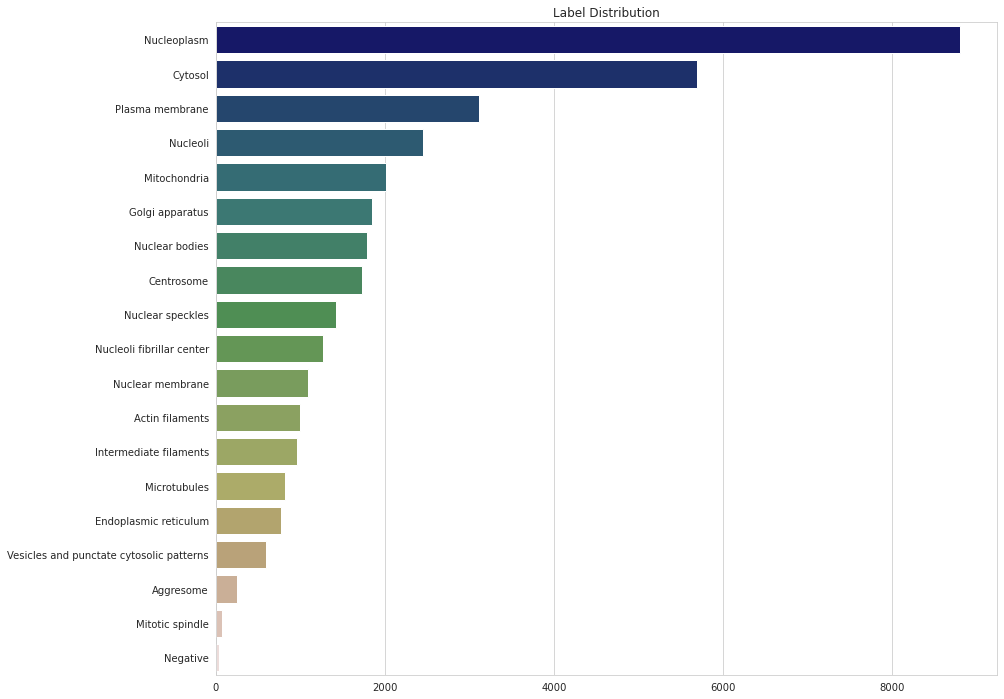

In [7]:
plt.figure(figsize=(14,12))
with sns.axes_style("whitegrid"):
    aa = sns.barplot(y=class_counts.index.values, x=class_counts.values, palette='gist_earth')
    plt.title("Label Distribution")

<font size = '4' >**helper function**</font>

In [8]:
# read and visualize sample image
def read_sample_image(filename):
    
    '''
    read individual images
    of different filters (R, G, B, Y)
    and stack them.
    ---------------------------------
    Arguments:
    filename -- sample image path
    
    Returns:
    stacked_images -- stacked (RGBY) image
    '''
    ROOT = "../input/hpa-single-cell-image-classification/"
    red = cv2.imread(os.path.join(ROOT, 'train/') + filename + "_red.png", cv2.IMREAD_UNCHANGED)
    green = cv2.imread(os.path.join(ROOT, 'train/') + filename + "_green.png", cv2.IMREAD_UNCHANGED)
    blue = cv2.imread(os.path.join(ROOT, 'train/') + filename + "_blue.png", cv2.IMREAD_UNCHANGED)
    yellow = cv2.imread(os.path.join(ROOT, 'train/') + filename + "_yellow.png", cv2.IMREAD_UNCHANGED)

    stacked_images = np.transpose(np.array([red, green, blue, yellow]), (1,2,0))
    return stacked_images

def plot_all(im, label):
    
    '''
    plot all RGBY image,
    Red, Green, Blue, Yellow, 
    filters images.
    --------------------------
    Argument:
    im - image
    '''
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 5, 1)
    plt.imshow(im[:,:,:3])
    plt.title('RGBY Image')
    plt.axis('off')
    plt.subplot(1, 5, 2)
    plt.imshow(im[:,:,0], cmap='Reds')
    plt.title('Microtubule channels')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.imshow(im[:,:,1], cmap='Greens')
    plt.title('Protein of Interest')
    plt.axis('off')
    plt.subplot(1, 5, 4)
    plt.imshow(im[:,:,2], cmap='Blues')
    plt.title('Nucleus')
    plt.axis('off')
    plt.subplot(1, 5, 5)
    plt.imshow(im[:,:,3], cmap='Oranges')
    plt.title('Endoplasmic Reticulum')
    plt.axis('off')
    plt.show()

# read and visualize sample image
def read_sample_image_seg(filename):
    
    '''
    read individual images
    of different filters (R, B, Y)
    and stack them for segmentation.
    ---------------------------------
    Arguments:
    filename -- sample image file path
    
    Returns:
    stacked_images -- stacked (RBY) image path in lists.
    '''

    red = "../input/hpa-single-cell-image-classification/train" + filename + "_red.png"
    blue = "../input/hpa-single-cell-image-classification/train" + filename + "_blue.png"
    yellow = "../input/hpa-single-cell-image-classification/train"+ filename + "_yellow.png"

    stacked_images = [[red], [yellow], [blue]]
    return stacked_images, red, blue, yellow

# segment cell 
def segmentCell(image, segmentator):
    
    '''
    segment cell and nuclei from
    microtubules, endoplasmic reticulum,
    and nuclei (R, B, Y) filters.
    ------------------------------------
    Argument:
    image -- (R, B, Y) list of image arrays
    segmentator -- CellSegmentator class object
    
    Returns:
    cell_mask -- segmented cell mask
    '''
    
    nuc_segmentations = segmentator.pred_nuclei(image[2])
    cell_segmentations = segmentator.pred_cells(image)
    nuclei_mask, cell_mask = label_cell(nuc_segmentations[0], cell_segmentations[0])
    
    gc.collect(); del nuc_segmentations; del cell_segmentations; del nuclei_mask
    
    return cell_mask

# plot segmented cells mask, image
def plot_cell_segments(mask, red, blue, yellow):
    
    '''
    plot segmented cells
    and images
    ---------------------
    Arguments:
    mask -- cell mask
    red -- red filter image path
    blue -- blue filter image path
    yellow -- yellow filter image path
    '''
    microtubule = plt.imread(r)    
    endoplasmicrec = plt.imread(b)    
    nuclei = plt.imread(y)
    img = np.dstack((microtubule, endoplasmicrec, nuclei))
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.title('Mask')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(mask, alpha=0.6)
    plt.title('Image + Mask')
    plt.axis('off')
    plt.show()

# plot single segmented cells mask, image
def plot_single_cell(mask, red, blue, yellow):
    
    '''
    plot single cell mask
    and image
    ---------------------
    Arguments:
    mask -- cell mask
    red -- red filter image path
    blue -- blue filter image path
    yellow -- yellow filter image path
    '''
    microtubule = plt.imread(r)    
    endoplasmicrec = plt.imread(b)    
    nuclei = plt.imread(y)
    img = np.dstack((microtubule, endoplasmicrec, nuclei))
    
    contours= cv2.findContours(mask.astype('uint8'),
                               cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours[0]]
    x = np.argsort(areas)
    cnt = contours[0][x[-1]]
    x,yc,w,h = cv2.boundingRect(cnt)
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(img[yc:yc+h, x:x+w])
    plt.title('Cell Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(mask[yc:yc+h, x:x+w])
    plt.title('Cell Mask')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img[yc:yc+h, x:x+w])
    plt.imshow(mask[yc:yc+h, x:x+w], alpha=0.6)
    plt.title('Cell Image + Mask')
    plt.axis('off')
    plt.show()

Nucleoplasm


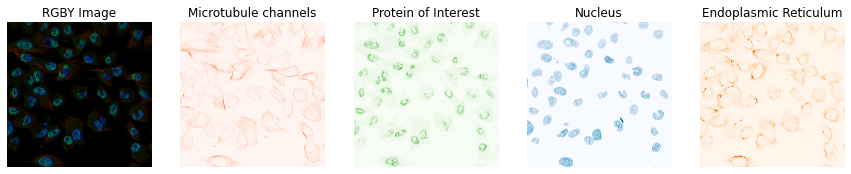

Nuclear membrane


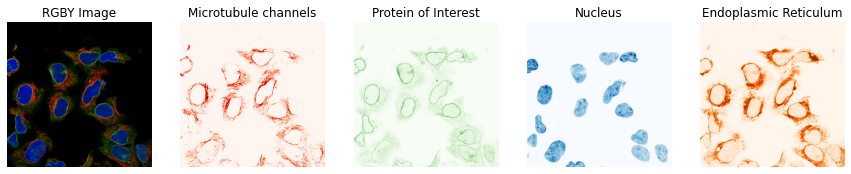

Nucleoli


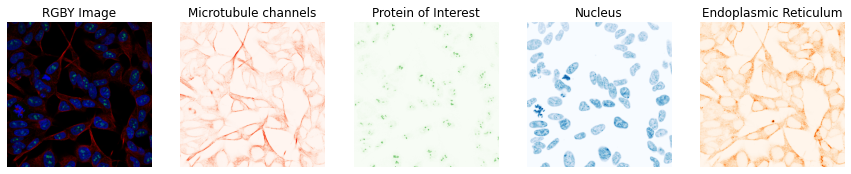

Nucleoli fibrillar center


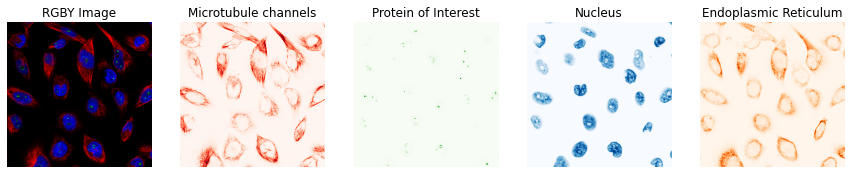

Nuclear speckles


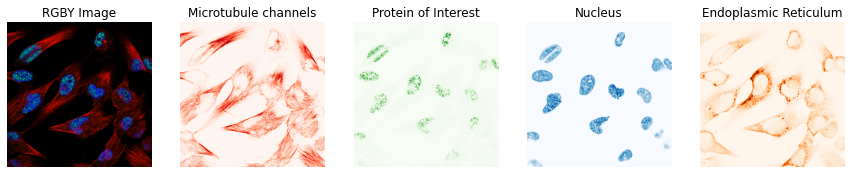

Nuclear bodies


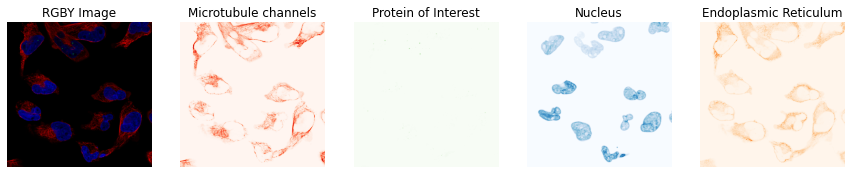

Endoplasmic reticulum


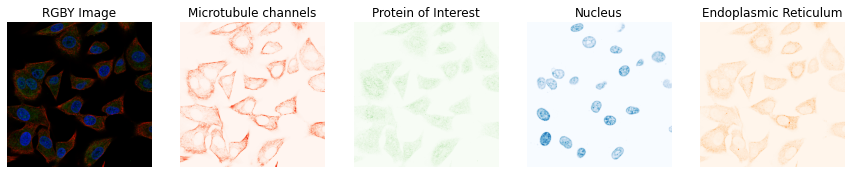

Golgi apparatus


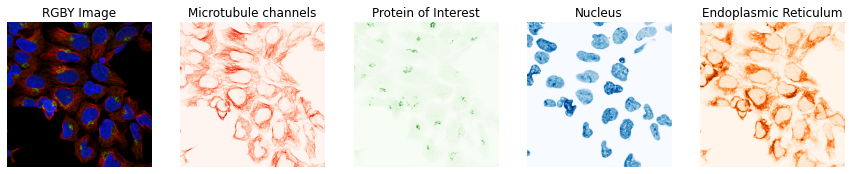

Intermediate filaments


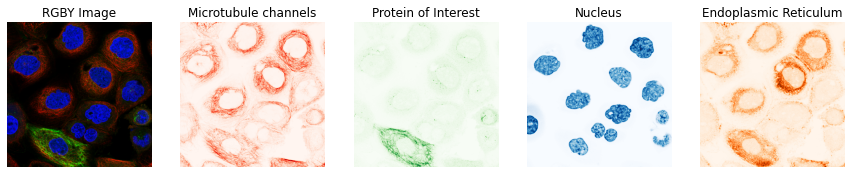

Actin filaments


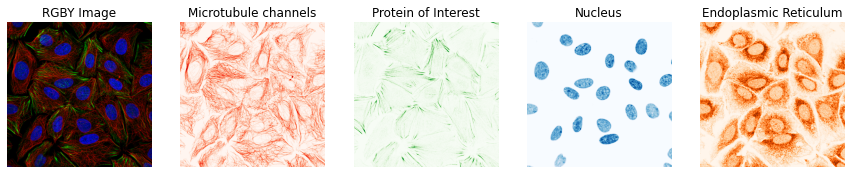

Microtubules


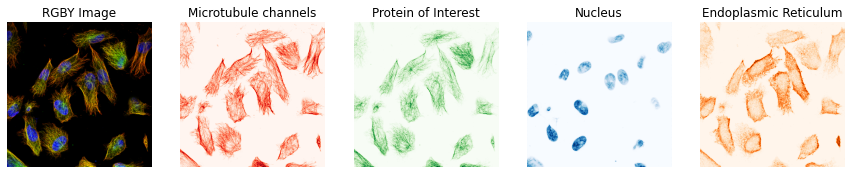

Mitotic spindle


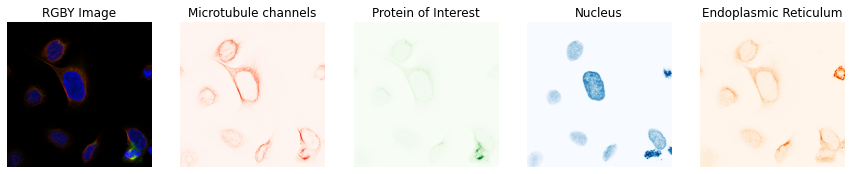

Centrosome


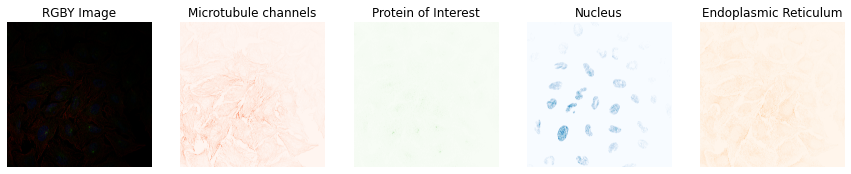

Plasma membrane


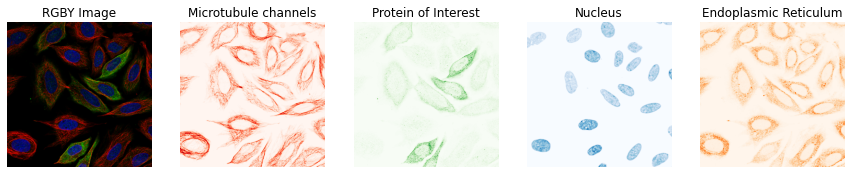

Mitochondria


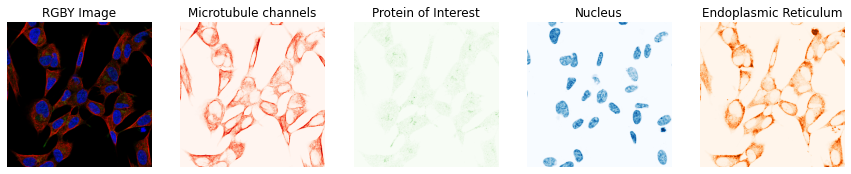

Aggresome


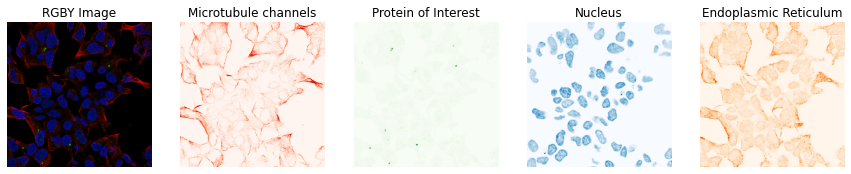

Cytosol


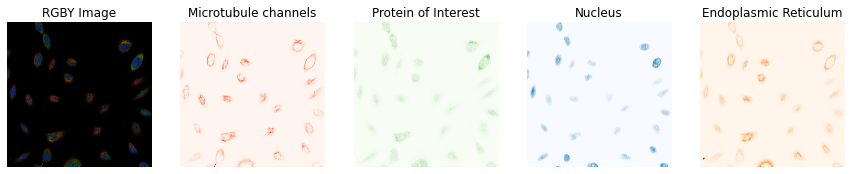

Vesicles and punctate cytosolic patterns


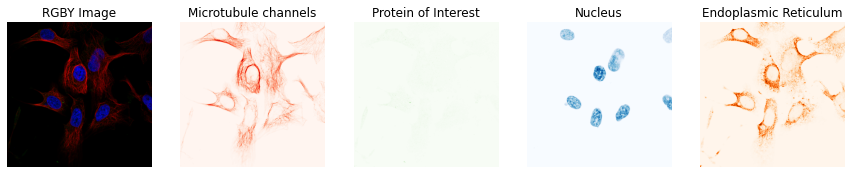

Negative


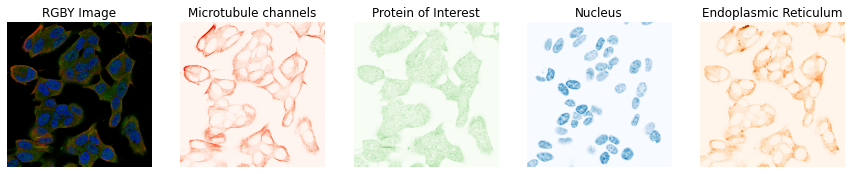

In [9]:
train = train_df.loc[train_df['Label'].apply(lambda x: len(x)==1)==True]

for label in train_df.drop(['ID', 'Label'], axis=1):
    print(label)
    im = read_sample_image(train[train[label]==1].sample(1).ID.to_string().split(' ')[4])
    plot_all(im, label)

<font size = '6' >**Prepare the dataset**</font>

In [10]:
def decode_img(img, img_size=(224,224)):

    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_png(img, channels=1)

    # resize the image to the desired size
    return tf.cast(tf.image.resize(img, img_size), tf.uint8)


def get_color_path_maps(color_dirs, tp_id_map):
    c_p_maps = [{k:[] for k in INT_2_STR.keys()} for _ in range(len(color_dirs))]
    color_d_paths = [
        [d_path for d_path in os.listdir(color_dir) if d_path.endswith("_256")] \
        for color_dir in color_dirs
    ]
    for c in tqdm(color_d_paths[0], total=len(color_d_paths[0])):
        
        # Get class stuff
        cls = c.split("_", 1)[1].rsplit("_",1)[0]
        cls_idx = STR_2_INT_LOWER[cls]
        
        # Get the relevant color directories
        c_dirs = [
            os.path.join(color_dir, c.replace("red", clr), "data", "train_tiles", cls) \
            for clr, color_dir in zip(["red", "green", "blue", "yellow"], color_dirs)
        ]

        # Update map
        for f_name in tqdm(os.listdir(c_dirs[0]), total=len(os.listdir(c_dirs[0]))):
            # get the relevant full paths
            full_paths = [os.path.join(c_dir, f_name.replace("red", clr)) for clr, c_dir in zip(["red", "green", "blue", "yellow"], c_dirs)]
            if tp_id_map==None:
                for c_p_map, full_path in zip(c_p_maps, full_paths):
                    c_p_map[cls_idx].append(full_path)
            elif (f_name.endswith(".png") and ("negative" in full_paths[0] or f_name.rsplit("_", 1)[0] in tp_id_map[cls_idx])):
                for c_p_map, full_path in zip(c_p_maps, full_paths):
                    c_p_map[cls_idx].append(full_path)
            else:
                for c_p_map, full_path in zip(c_p_maps, full_paths):
                    c_p_map[STR_2_INT["Negative"]].append(full_path)
    return [{k:sorted(v) for k,v in c_p_map.items()} for c_p_map in c_p_maps]

    
def flatten_list_of_lists(l_o_l):
    return [item for sublist in l_o_l for item in sublist]


def create_input_list(crp, cgp, cbp, cyp, shuffle=True, val_split=0.5):
    lbl_arr = flatten_list_of_lists([[k,]*len(v) for k, v in sorted(crp.items())])
    cr_arr = flatten_list_of_lists([v for k,v in sorted(crp.items())])
    cg_arr = flatten_list_of_lists([v for k,v in sorted(cgp.items())])
    cb_arr = flatten_list_of_lists([v for k,v in sorted(cbp.items())])
    cy_arr = flatten_list_of_lists([v for k,v in sorted(cyp.items())])
    
    if val_split is not None:
        val_lbl_arr = lbl_arr[:int(len(lbl_arr)*val_split)]
        lbl_arr = lbl_arr[int(len(lbl_arr)*val_split):]
        
        val_cr_arr = cr_arr[:int(len(cr_arr)*val_split)]
        cr_arr = cr_arr[int(len(cr_arr)*val_split):]
        
        val_cg_arr = cg_arr[:int(len(cg_arr)*val_split)]
        cg_arr = cg_arr[int(len(cg_arr)*val_split):]
        
        val_cb_arr = cb_arr[:int(len(cb_arr)*val_split)]
        cb_arr = cb_arr[int(len(cb_arr)*val_split):]

        val_cy_arr = cy_arr[:int(len(cy_arr)*val_split)]
        cy_arr = cy_arr[int(len(cy_arr)*val_split):]
        
    if shuffle:
        to_shuffle = list(zip(cr_arr, cg_arr, cb_arr, cy_arr, lbl_arr))
        random.shuffle(to_shuffle)
        cr_arr, cg_arr, cb_arr, cy_arr, lbl_arr = zip(*to_shuffle)
        
        if val_split is not None:
            val_to_shuffle = list(zip(val_cr_arr, val_cg_arr, val_cb_arr, val_cy_arr, val_lbl_arr))
            random.shuffle(val_to_shuffle)
            val_cr_arr, val_cg_arr, val_cb_arr, val_cy_arr, val_lbl_arr = zip(*val_to_shuffle)
    
    if val_split is None:
        return list(cr_arr), list(cg_arr), list(cb_arr), list(cy_arr), list(lbl_arr)
    else:
        return (list(cr_arr), list(cg_arr), list(cb_arr), list(cy_arr), list(lbl_arr)), \
               (list(val_cr_arr), list(val_cg_arr), list(val_cb_arr), list(val_cy_arr), list(val_lbl_arr))

In [11]:
# PRESETS
INT_2_STR = {0: 'Nucleoplasm', 
             1: 'Nuclear Membrane', 
             2: 'Nucleoli', 
             3: 'Nucleoli Fibrillar Center', 
             4: 'Nuclear Speckles', 
             5: 'Nuclear Bodies', 
             6: 'Endoplasmic Reticulum', 
             7: 'Golgi Apparatus', 
             8: 'Intermediate Filaments', 
             9: 'Actin Filaments', 
             10: 'Microtubules', 
             11: 'Mitotic Spindle', 
             12: 'Centrosome', 
             13: 'Plasma Membrane', 
             14: 'Mitochondria', 
             15: 'Aggresome', 
             16: 'Cytosol', 
             17: 'Vesicles', 
             18: 'Negative'}
INT_2_STR_LOWER = {k:v.lower().replace(" ", "_") for k,v in INT_2_STR.items()}
STR_2_INT_LOWER = {v:k for k,v in INT_2_STR_LOWER.items()}
STR_2_INT = {v:k for k,v in INT_2_STR.items()}

ROOT = "../input/"

RED_TILE_DIR = os.path.join(ROOT, "human-protein-atlas-red-cell-tile-dataset")
GREEN_TILE_DIR = os.path.join(ROOT, "human-protein-atlas-green-cell-tile-dataset")
BLUE_TILE_DIR = os.path.join(ROOT, "human-protein-atlas-blue-cell-tile-dataset")
YELLOW_TILE_DIR = os.path.join(ROOT, "human-protein-atlas-yellow-cell-tile-dataset")

TILE_DIRS = [RED_TILE_DIR, GREEN_TILE_DIR, BLUE_TILE_DIR, YELLOW_TILE_DIR]

# Define the paths to the training files for the tile dataset as a map from class index to list of paths
RED_FILE_MAP, GREEN_FILE_MAP, BLUE_FILE_MAP, YELLOW_FILE_MAP = \
    get_color_path_maps(TILE_DIRS, None)

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2275 [00:00<?, ?it/s]

  0%|          | 0/17527 [00:00<?, ?it/s]

  0%|          | 0/7789 [00:00<?, ?it/s]

  0%|          | 0/18825 [00:00<?, ?it/s]

  0%|          | 0/5619 [00:00<?, ?it/s]

  0%|          | 0/10198 [00:00<?, ?it/s]

  0%|          | 0/4845 [00:00<?, ?it/s]

  0%|          | 0/37472 [00:00<?, ?it/s]

  0%|          | 0/21168 [00:00<?, ?it/s]

  0%|          | 0/22738 [00:00<?, ?it/s]

  0%|          | 0/15337 [00:00<?, ?it/s]

  0%|          | 0/952 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11194 [00:00<?, ?it/s]

  0%|          | 0/5322 [00:00<?, ?it/s]

  0%|          | 0/12882 [00:00<?, ?it/s]

  0%|          | 0/13952 [00:00<?, ?it/s]

  0%|          | 0/27494 [00:00<?, ?it/s]

  0%|          | 0/12672 [00:00<?, ?it/s]

In [12]:
VAL_FRAC = 0.01

# red_inputs, green_inputs, blue_inputs, yellow_inputs, labels
train_inputs, val_inputs = create_input_list(
    RED_FILE_MAP, 
    GREEN_FILE_MAP, 
    BLUE_FILE_MAP, 
    YELLOW_FILE_MAP, 
    shuffle=True,
    val_split=VAL_FRAC,
)

train_path_ds = tf.data.Dataset.zip(
    tuple([tf.data.Dataset.from_tensor_slices(input_ds) for input_ds in train_inputs])
)

# VALIDATION DATASET
val_path_ds = tf.data.Dataset.zip(
    tuple([tf.data.Dataset.from_tensor_slices(input_ds) for input_ds in val_inputs])
)

In [13]:
def preprocess_path_ds(rp, gp, bp, yp, lbl, img_size=(224,224), combine=True, drop_yellow=True, no_neg=False):    
    # Adjust class output expectation
    if no_neg:
        if lbl==18:
            lbl_arr = tf.zeros((18,), dtype=tf.uint8)
        else:
            lbl_arr = tf.one_hot(lbl, 18, dtype=tf.uint8)
    else:
        lbl_arr = tf.one_hot(lbl, 19, dtype=tf.uint8)
    
    ri = decode_img(tf.io.read_file(rp), img_size)
    gi = decode_img(tf.io.read_file(gp), img_size)
    bi = decode_img(tf.io.read_file(bp), img_size)

    if combine and drop_yellow:
        return tf.stack([ri[..., 0], gi[..., 0], bi[..., 0]], axis=-1), lbl_arr
    elif combine:
        yi = decode_img(tf.io.read_file(yp), img_size)
        return tf.stack([ri[..., 0], gi[..., 0], bi[..., 0], yi[..., 0]], axis=-1), lbl_arr
    elif drop_yellow:
        return ri, gi, bi, lbl_arr
    else:
        yi = decode_img(tf.io.read_file(yp), img_size)
        return ri, gi, bi, yi, lbl_arr
    

def augment(img_batch, lbl_batch):
    # SEEDING & KERNEL INIT
    K = tf.random.uniform((1,), minval=0, maxval=4, dtype=tf.dtypes.int32)[0]
    
    img_batch = tf.image.random_flip_left_right(img_batch)
    img_batch = tf.image.random_flip_up_down(img_batch)
    img_batch = tf.image.rot90(img_batch, K)
    
    img_batch = tf.image.random_saturation(img_batch, 0.85, 1.15)
    img_batch = tf.image.random_brightness(img_batch, 0.1)
    img_batch = tf.image.random_contrast(img_batch, 0.85, 1.15)

    
#     img_crop = tf.image.random_crop(img_batch,size = [32, 192, 192, 3])
#     img_batch = tf.image.resize(img_crop, (224,224))

    return img_batch, lbl_batch

TRAIN_CACHE_DIR = "/kaggle/train_cache"
VAL_CACHE_DIR = "/kaggle/val_cache"

if not os.path.isdir(TRAIN_CACHE_DIR):
    os.makedirs(TRAIN_CACHE_DIR, exist_ok=True)
if not os.path.isdir(VAL_CACHE_DIR):
    os.makedirs(VAL_CACHE_DIR, exist_ok=True)

train_ds = train_path_ds.map(
    lambda r,g,b,y,l: preprocess_path_ds(r,g,b,y,l), 
    num_parallel_calls=tf.data.AUTOTUNE
)
val_ds = val_path_ds.map(
    lambda r,g,b,y,l: preprocess_path_ds(r,g,b,y,l), 
    num_parallel_calls=tf.data.AUTOTUNE
)

    
train_ds = train_ds.cache(TRAIN_CACHE_DIR) \
                   .shuffle(2) \
                   .batch(32) \
                   .map(augment, num_parallel_calls=tf.data.AUTOTUNE) \
                   .prefetch(tf.data.AUTOTUNE)


val_ds = val_ds.cache(VAL_CACHE_DIR) \
               .batch(32) \
               .prefetch(tf.data.AUTOTUNE)

<font size = '6' >**Train the model**</font>

In [14]:
epochs = 10
classes = 19
dropout = 0.5


def FocalLoss(targets, inputs, alpha=0.25,gamma=2):        
    
    inputs = K.flatten(inputs)
    targets = K.flatten(targets)
    inputs = tf.cast(inputs,dtype=tf.float32)
    targets = tf.cast(targets,dtype=tf.float32)
    BCE = K.binary_crossentropy(targets, inputs)
    BCE_EXP = K.exp(-BCE)
    focal_loss = K.mean(alpha * K.pow((1-BCE_EXP), gamma) * BCE)
    
    return focal_loss

Xception_model = tf.keras.applications.Xception(
    include_top=False, weights='imagenet',
    input_shape=(224,224,3), pooling="avg", classes=classes,
)

my_model = tf.keras.layers.BatchNormalization()(Xception_model.output)
my_model = tf.keras.layers.Dropout(dropout)(my_model)
for n_nodes in (512,):
    my_model = tf.keras.layers.Dense(n_nodes, activation="relu")(my_model)
    my_model = tf.keras.layers.BatchNormalization()(my_model)
    my_model = tf.keras.layers.Dropout(0.05)(my_model)
output = tf.keras.layers.Dense(classes, activation="sigmoid")(my_model)
my_model = tf.keras.Model(inputs=Xception_model.inputs, outputs=output)


my_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr = 5e-4),
    loss='binary_crossentropy',
    metrics=["accuracy"])

my_model.summary()

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join("/kaggle/working", "{epoch:04d}-{val_loss:.4f}.ckpt"), verbose=1),
lr_Reducer = tf.keras.callbacks.ReduceLROnPlateau(
     monitor="val_loss", patience=2, min_lr=1e-6, mode='min',verbose = 1)

history = my_model.fit(
    train_ds, 
    validation_data=val_ds, 
    callbacks=[checkpoint, lr_Reducer],
    epochs=epochs,
    verbose=1,
)


83689472/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_____________________________

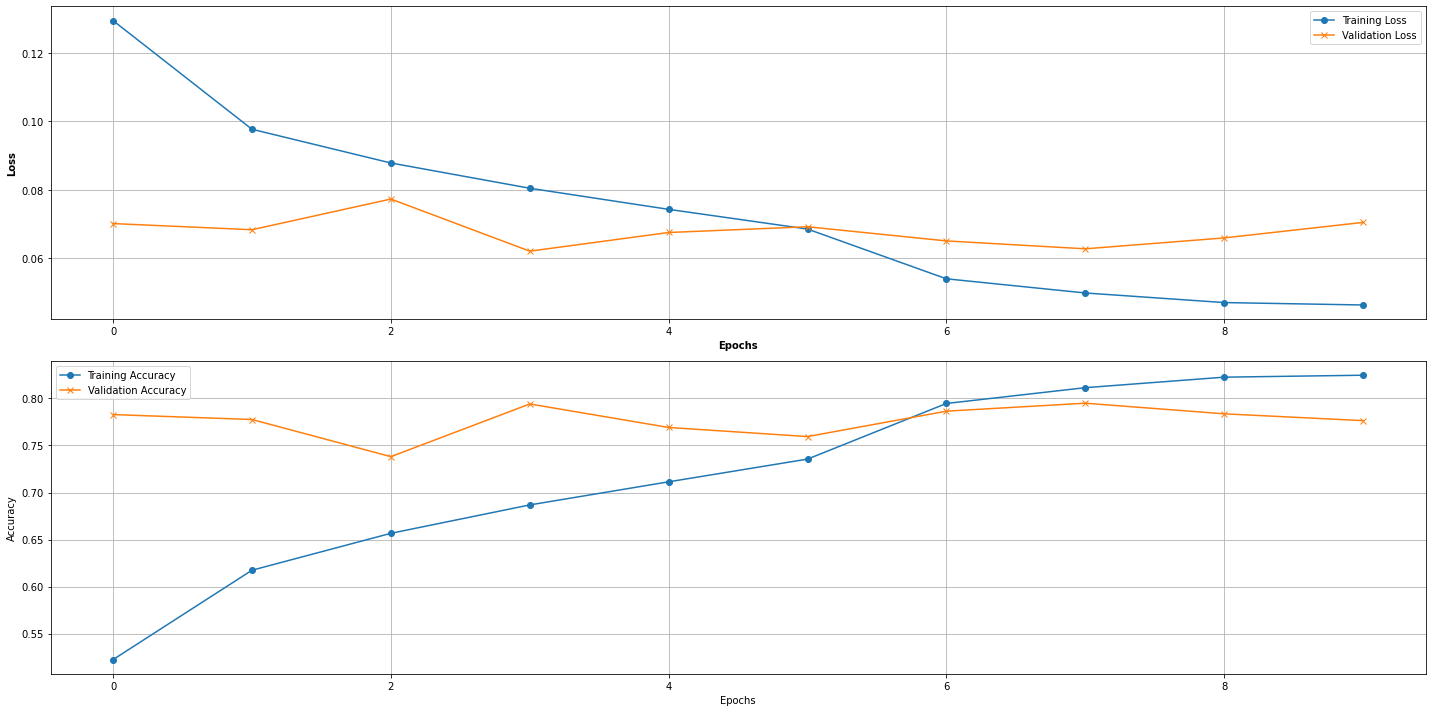

In [15]:
plt.figure(figsize = (20, 10))
 
plt.subplot(2,1,1)
plt.xlabel("Epochs", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.plot(history.history["loss"], label = "Training Loss" , marker='o')
plt.plot(history.history["val_loss"], label = "Validation Loss" , marker='x')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label = "Training Accuracy" , marker='o')
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy" , marker='x')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
!tar -zcvf out.tar.gz /kaggle/working/
from IPython.display import FileLink
FileLink(r'out.tar.gz')

tar: Removing leading `/' from member names
/kaggle/working/
/kaggle/working/0010-0.0705.ckpt/
/kaggle/working/0010-0.0705.ckpt/assets/
/kaggle/working/0010-0.0705.ckpt/variables/
/kaggle/working/0010-0.0705.ckpt/variables/variables.index
/kaggle/working/0010-0.0705.ckpt/variables/variables.data-00000-of-00001
/kaggle/working/0010-0.0705.ckpt/saved_model.pb
/kaggle/working/0005-0.0675.ckpt/
/kaggle/working/0005-0.0675.ckpt/assets/
/kaggle/working/0005-0.0675.ckpt/variables/
/kaggle/working/0005-0.0675.ckpt/variables/variables.index
/kaggle/working/0005-0.0675.ckpt/variables/variables.data-00000-of-00001
/kaggle/working/0005-0.0675.ckpt/saved_model.pb
/kaggle/working/0006-0.0692.ckpt/
/kaggle/working/0006-0.0692.ckpt/assets/
/kaggle/working/0006-0.0692.ckpt/variables/
/kaggle/working/0006-0.0692.ckpt/variables/variables.index
/kaggle/working/0006-0.0692.ckpt/variables/variables.data-00000-of-00001
/kaggle/working/0006-0.0692.ckpt/saved_model.pb
/kaggle/working/0004-0.0621.ckpt/
/kaggle/

/kaggle/working/out.tar.gz